<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-setup" data-toc-modified-id="Notebook-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook setup</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import data</a></span><ul class="toc-item"><li><span><a href="#Cancer-risk-for-each-mCA" data-toc-modified-id="Cancer-risk-for-each-mCA-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cancer risk for each mCA</a></span></li><li><span><a href="#Inferred-s-and-mu-values" data-toc-modified-id="Inferred-s-and-mu-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Inferred s and mu values</a></span></li></ul></li><li><span><a href="#Cancer-risk" data-toc-modified-id="Cancer-risk-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cancer risk</a></span></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Notebook setup

In [2]:
# imported packages
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
import csv
import numpy as np
import scipy
import scipy.stats as stats
import seaborn
from seaborn import regplot

In [3]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [4]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [5]:
neutral_color='#fdbf6f'
gain_color = '#e31a1c'
loss_color = '#a6cee3'

In [6]:
mCA_type_dict = {'+': 'gain', '-': 'loss', '=': 'CN-LOH'}
mCA_colors_dict = {'+': gain_color, '-': loss_color, '=': neutral_color}

# Functions

In [7]:
def create_dataframe_cancer_risk(mCA_s_mu_dict, cancer_risk, list_of_mCAs, cancer_type):
    
    cancer_risk_dict = {}
    
    for mCA in list_of_mCAs:
        mCA_type = mCA_type_dict[mCA[-1]]
        if mCA in mCA_s_mu_dict.keys():
            observations = mCA_s_mu_dict[mCA]['N_single_mCA']
            s = mCA_s_mu_dict[mCA]['s']
            mu = mCA_s_mu_dict[mCA]['mu']
            if observations >=30:
                if mCA in cancer_risk.keys():
                    OR_risk = cancer_risk[mCA][cancer_type]['OR']
                    if OR_risk!=0:
                        cancer_risk_dict[mCA]={'s': s, cancer_type: np.log(OR_risk)}
          
    cancer_risk_df = pd.DataFrame.from_dict(cancer_risk_dict, orient = 'index')
    
    return cancer_risk_df

In [8]:
def plt_regression(x, y, data, ax):
    reg_plot = regplot(x=x, y=y, fit_reg=True, data=data, ci = 95, ax = ax, scatter = False, color = grey4)
    return reg_plot

In [30]:
def cancer_risk_mCAs(mCA_s_mu_dict, significant_risk, cancer_type):
    fig, ax1 = plt.subplots(figsize=(10, 7), nrows=1, ncols=1)

    x1_sig = []
    y1_sig = []
    colors_sig = []
    labels_sig = []
    
    x1 = []
    y1 = []
    colors = []
    labels = []
    
    all_labels = []
    
    number_mCAs_plottted = 0
    
    for mCA in mCA_s_mu_dict.keys():
        mCA_type = mCA_type_dict[mCA[-1]]
        observations = mCA_s_mu_dict[mCA]['N_single_mCA']
        s = mCA_s_mu_dict[mCA]['s']
        mu = mCA_s_mu_dict[mCA]['mu']
        if observations >=30:
            if mCA in cancer_risk.keys():
                OR_risk = cancer_risk[mCA][cancer_type]['OR']
                if OR_risk != 0:
                    number_mCAs_plottted+=1
                    if mCA in significant_risk[cancer_type]:
                        x1_sig.append(s)
                        y1_sig.append(np.log(OR_risk))
                        colors_sig.append(mCA_colors_dict[mCA[-1]])
                        labels_sig.append(mCA)
                        all_labels.append(mCA)
                    else:
                        x1.append(s)
                        y1.append(np.log(OR_risk))
                        colors.append(mCA_colors_dict[mCA[-1]])
                        labels.append(mCA)
                        all_labels.append(mCA)
                        
    print('number of mCAs plotted = ', number_mCAs_plottted)
    
    m_size = 160
    t = 60
    
    pearson_r, p_value = scipy.stats.pearsonr(x1+x1_sig, y1+y1_sig)
    cancer_risk_df = create_dataframe_cancer_risk(mCA_s_mu_dict, cancer_risk, all_labels, cancer_type)
    cancer_risk_regression = plt_regression('s', cancer_type, cancer_risk_df, ax = ax1)
    ax1.text(0.10, np.log(70), '$R$ = '+str(round(pearson_r, 2))+', $p$ = '+'{:.2e}'.format(p_value), fontsize = 16, color = grey3)
    
    ax1.scatter(x1, y1, color = colors, s = m_size, lw = 1, edgecolor = 'k', zorder = 50, alpha = 0.5)
    ax1.scatter(x1_sig, y1_sig, color = colors_sig, s = m_size, lw = 1, edgecolor = 'k', zorder = 50, alpha = 1)
    
    for x_1, y_1, label in zip(x1, y1, labels):
        if y_1 !=0.1:
            ax1.annotate(text = label, xy = (x_1, y_1), xytext = (8, 8), textcoords = 'offset pixels', alpha = 0.5)
            
    for x_1, y_1, label in zip(x1_sig, y1_sig, labels_sig):
        if y_1 !=0.1:
            ax1.annotate(text = label, xy = (x_1, y_1), xytext = (8, 8), textcoords = 'offset pixels')

    ax1.set_xlim(0.095, 0.195)
    
    ax1.set_ylabel('odds ratio of '+cancer_type, fontsize = 18)
    
    ax1.grid(axis = 'y', which = 'both', zorder = 0, color = grey3, lw = 1, linestyle = ':', alpha = 0.5)
    ax1.grid(axis = 'x', which = 'major', zorder = 0, color = grey3, lw = 1, linestyle = ':', alpha = 0.5)

    y_ticks = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    y_tick_labels = ['', '', '', '', '', '', '', '1', '', '', '', '5', '', '', '', '', '10', '', '', '', '50', '', '', '', '', '100']

    ax1.set_yticks([np.log(i) for i in y_ticks])
    ax1.set_yticklabels(y_tick_labels, fontsize = 16)

    x_major_ticks = [ 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]
    x_major_tick_labels = ["10", "11", "12", "13", "14", "15", "16", "17", "18", "19"]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = 16)

    ax1.tick_params(axis = 'both', which = 'major', color = grey4)
    ax1.tick_params(axis = 'both', which='minor', bottom=False)
    
    ax1.set_xlabel('mCA fitness effect (% per year)', fontsize = 16)
    ax1.set_ylabel('odds ratio of '+cancer_type, fontsize = 16)
    
    labelname = cancer_type.replace(' ', '_')
    
    plt.tight_layout()
    plt.savefig('Figure_4_cancer_risk_'+labelname+'.pdf')
    
    return plt.show()

# Import data

## Cancer risk for each mCA

In [46]:
# Create a dictionary containing cancer risk with each mCA
with open('Data_files/Loh_2020_cancer_risk.csv') as csvfile: #Supplementary table from Loh et al 2020
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count = 0
    
    cancer_risk = {}
    
    for row in read_reader:
        if row_count > 2:
            mCA = row[0]
            CLL_p_value = float(row[1])
            CLL_OR = float(row[2])
            CLL_95_lower = float(row[3])
            CLL_95_upper = float(row[4])
            MPN_p_value = float(row[5])
            MPN_OR  = float(row[6])
            MPN_95_lower = float(row[7])
            MPN_95_upper = float(row[8])
            MDS_p_value = float(row[9])
            MDS_OR = float(row[10])
            MDS_95_lower = float(row[11])
            MDS_95_upper = float(row[12])
            blood_cancer_p_value = float(row[13])
            blood_cancer_OR = float(row[14])
            blood_cancer_95_lower = float(row[15])
            blood_cancer_95_upper = float(row[16])
            
            cancer_risk[mCA]= {'CLL': {'OR': CLL_OR, '95_lower': CLL_95_lower, '95_upper': CLL_95_upper, 'p-value': CLL_p_value},
                              'MPN': {'OR': MPN_OR, '95_lower': MPN_95_lower, '95_upper': MPN_95_upper, 'p-value': MPN_p_value},
                              'MDS': {'OR': MDS_OR, '95_lower': MDS_95_lower, '95_upper': MDS_95_upper, 'p-value': MDS_p_value},
                              'any blood cancer': {'OR': blood_cancer_OR, '95_lower': blood_cancer_95_lower, '95_upper': blood_cancer_95_upper, 'p-value': blood_cancer_p_value}}
            
        row_count+=1
        
cancer_risk

In [34]:
#Create a dictionary of the mCAs associated with statistically significantly increased risk of blood cancers (from Loh et al 2020)
significant_risk = {}

for mCA, v in cancer_risk.items():
    for cancer, risks in v.items():
        if risks['p-value']<0.05:
            if cancer in significant_risk.keys():
                significant_risk[cancer].append(mCA)
            if cancer not in significant_risk.keys():
                significant_risk[cancer]=[mCA]

## Inferred s and mu values

- Fitness and mutation rates inferred using mCA_mu_and_s_MLE_using_heatmaps.py

In [35]:
mCA_s_mu = pd.read_csv('Data_files/mCA_s_mu_with_confidence_intervals_individual_mCAs.txt', sep = '\t')
mCA_s_mu = mCA_s_mu.set_index('mCA')
mCA_s_mu_dict = pd.DataFrame.to_dict(mCA_s_mu, orient = 'index')

# Cancer risk

number of mCAs plotted =  41


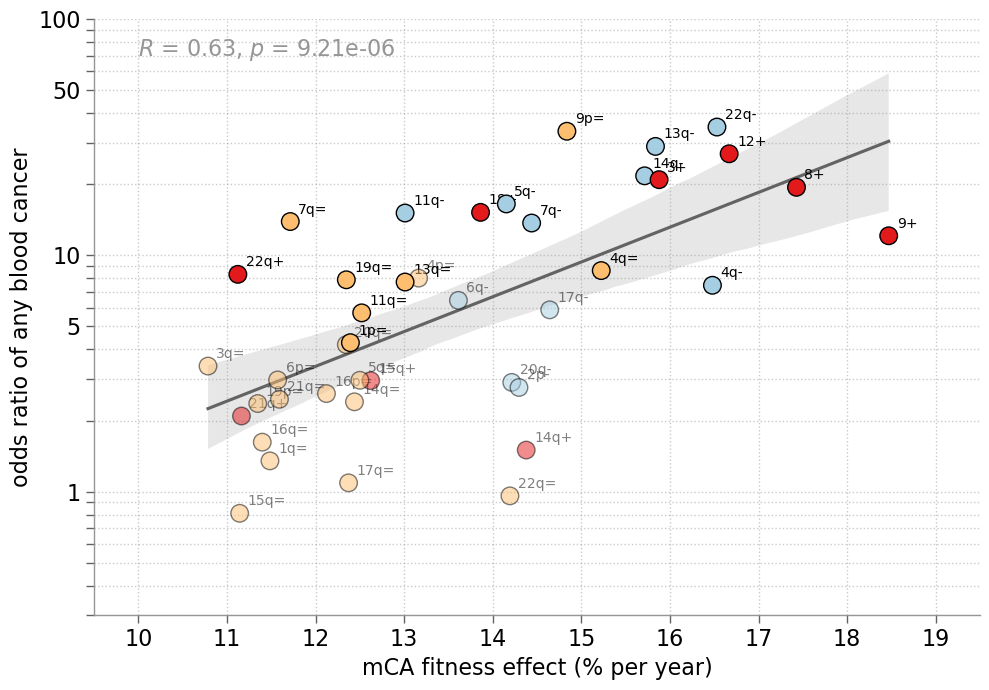

In [36]:
cancer_risk_mCAs(mCA_s_mu_dict, significant_risk, 'any blood cancer')